## Importing the Required Libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #Numerical Analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
from sklearn.preprocessing import OneHotEncoder# creates new (binary) columns,indicating the presence 
#of each possible value from the original data
from sklearn.compose import ColumnTransformer# both the label and OH encoding done 
from sklearn.model_selection import train_test_split # splitting the data into train and test
from sklearn.tree import DecisionTreeClassifier # Machine Learning Algorithm
import pickle # for pickel our model

## Reading the dataset

In [2]:
data=pd.read_csv(r"E:\PROJECTS\Body Fitness Prediction\dataset\25.csv") 
data.shape

(96, 7)

## Exploratory Data Analysis

In [3]:
data.head(8) # return you the top 5 data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
5,2017-10-11,4545,100,149,6,0,66
6,2017-10-12,4340,100,140,6,0,66
7,2017-10-13,1230,100,38,7,0,66


In [4]:
data.tail() # return you the bottom 5 data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64
95,2018-01-09,2203,300,0,5,500,64


In [5]:
data.columns # column names present in the dataset

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [6]:
data.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [7]:
data.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


### Finding the categorical variable

In [8]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('O')], dtype=object), array([6, 1], dtype=int64))

In [9]:
def category(data): # function
    for i in data.columns: # looping with each column data
        print(i)
        print(data[i].unique()) # finding unique data 
        print("x"*90)
category(data) # calling our function

date
['2017-10-06' '2017-10-07' '2017-10-08' '2017-10-09' '2017-10-10'
 '2017-10-11' '2017-10-12' '2017-10-13' '2017-10-14' '2017-10-15'
 '2017-10-16' '2017-10-17' '2017-10-18' '2017-10-19' '2017-10-20'
 '2017-10-21' '2017-10-22' '2017-10-23' '2017-10-24' '2017-10-25'
 '2017-10-26' '2017-10-27' '2017-10-28' '2017-10-29' '2017-10-30'
 '2017-10-31' '2017-11-01' '2017-11-02' '2017-11-03' '2017-11-04'
 '2017-11-05' '2017-11-06' '2017-11-07' '2017-11-08' '2017-11-09'
 '2017-11-10' '2017-11-11' '2017-11-12' '2017-11-13' '2017-11-14'
 '2017-11-15' '2017-11-16' '2017-11-17' '2017-11-18' '2017-11-19'
 '2017-11-20' '2017-11-21' '2017-11-22' '2017-11-23' '2017-11-24'
 '2017-11-25' '2017-11-26' '2017-11-27' '2017-11-28' '2017-11-29'
 '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03' '2017-12-04'
 '2017-12-05' '2017-12-06' '2017-12-07' '2017-12-08' '2017-12-09'
 '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14'
 '2017-12-15' '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19'
 '201

In [10]:
data["bool_of_active"].unique() # 0 = inactive , 500 = active

array([  0, 500], dtype=int64)

In [11]:
data["mood"].unique() # 100 = sad , 200 = neutral  , 300 = happy

array([200, 100, 300], dtype=int64)

In [12]:
data['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

In [13]:
data['hours_of_sleep'].unique()

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

### Finding the correlation 

In [14]:
data.corr() #  high correlation = step_count and calories_burned (r = 0.98)
# moderate correlation between mood and body_weight (r = -0.40)
# moderate positive correlation between the feeling_of_active and mood (r = 0.41).

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.246738,0.989260,0.080687,0.120212,0.109404
mood,0.246738,1.000000,0.235044,0.210417,0.379646,-0.458776
calories_burned,0.989260,0.235044,1.000000,0.080726,0.110900,0.112200
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.136603,0.189118
bool_of_active,0.120212,0.379646,0.110900,0.136603,1.000000,-0.296443
weight_kg,0.109404,-0.458776,0.112200,0.189118,-0.296443,1.000000


## Taking care of missing values

In [15]:
data.isnull().any() # it will return true if any column is having null values

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

In [16]:
data.isnull().sum() # used for find the count of null values

date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64

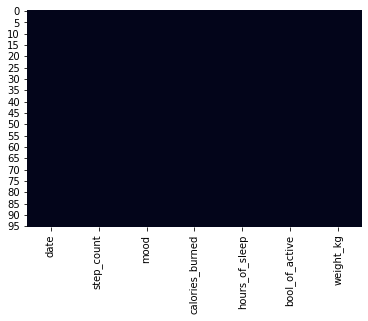

In [17]:
sns.heatmap(data.isnull(),cbar=False)

## Label Encoding the target column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

# Data Visualization

### Univariate Analysis

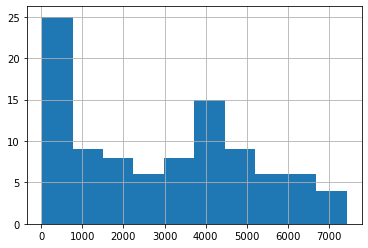

In [18]:
data['step_count'].hist()

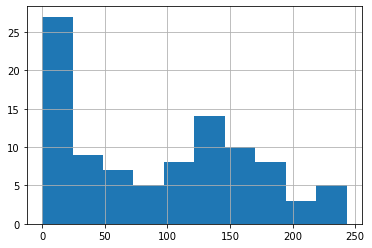

In [19]:
data['calories_burned'].hist()  #Histogram of calories_burned

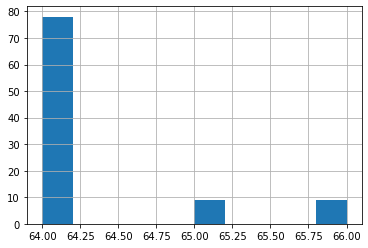

In [20]:
data['weight_kg'].hist()  #histogram of weight_kg

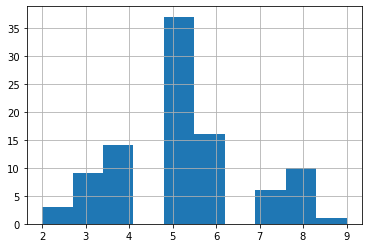

In [21]:
data['hours_of_sleep'].hist()  #Histogram of hours_of_sleep

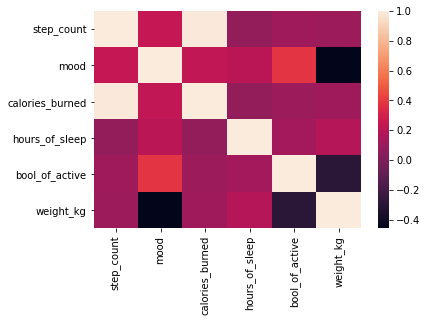

In [22]:
corr=data.corr() # correlation of the data
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)  #Heatmap

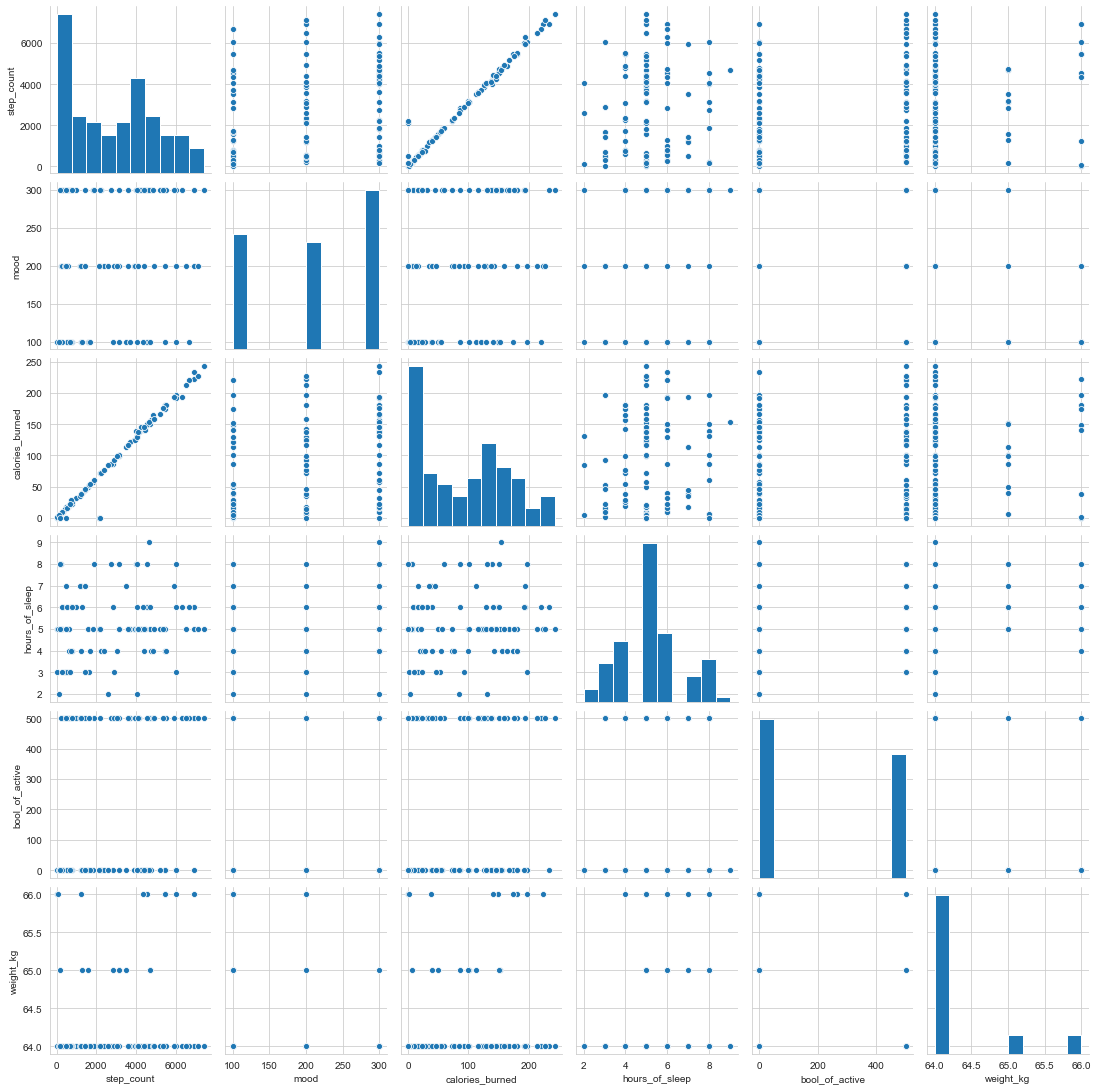

In [23]:
sns.set_style("whitegrid")
sns.pairplot(data)  #scatterplot of all variables

## Bivariate Analysis

### step count vs mood

In [24]:
data['step_count'].groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,2103.068966,2057.012361,25.0,299.0,1258.0,3721.00,6676.0
200,27.0,3153.777778,2091.761446,202.0,1339.0,3066.0,4245.50,7102.0
300,40.0,3392.725000,2115.006540,153.0,1314.5,4048.5,4804.25,7422.0


<Figure size 432x360 with 0 Axes>

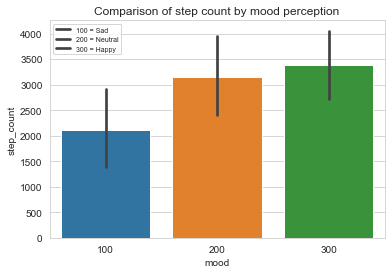

<Figure size 432x360 with 0 Axes>

In [25]:
sns.barplot(x="mood",y="step_count",data=data)
plt.title('Comparison of step count by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

### Step Count vs Activeness

In [26]:
data.step_count.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,2709.888889,2059.107323,25.0,663.75,2486.5,4411.5,6930.0
500,42.0,3226.571429,2238.337734,221.0,1037.00,3362.0,4843.0,7422.0


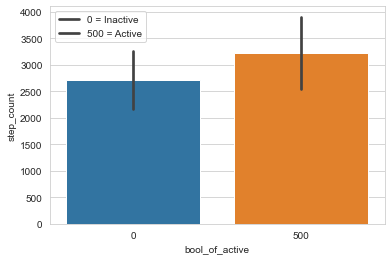

In [27]:
sns.barplot(x='bool_of_active',y="step_count",data=data)
plt.legend(['0 = Inactive','500 = Active'])

### Calories Burned vs Mood

In [28]:
data.calories_burned.groupby(data.mood)

<Figure size 432x360 with 0 Axes>

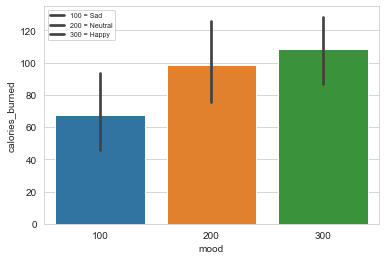

<Figure size 432x360 with 0 Axes>

In [29]:
#the distribution of SPENDED CALORIES by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="calories_burned", data = data)
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

### Calories Burned vs Activeness

In [30]:
#Average descriptive statistics_ of CALORIES SPENT by Activeness (0 = inactive and 500 = active)
data.calories_burned.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,86.481481,68.694495,0.0,17.25,80.0,144.5,234.0
500,42.0,102.404762,75.053821,0.0,25.25,108.5,156.0,243.0


<Figure size 432x360 with 0 Axes>

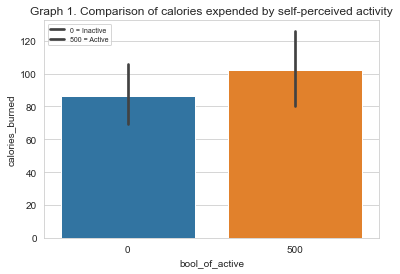

<Figure size 432x360 with 0 Axes>

In [31]:

# bar chart showing the distribution of EXPENDED CALORIES by category of Activeness (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="calories_burned", data = data)
plt.title('Graph 1. Comparison of calories expended by self-perceived activity')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

### Sleeping Hours vs Mood

In [32]:
#Average descriptive statistics of HOURS OF SLEEP by mood category (100 = sad, 200 = neutral and 300 = happy)
data.hours_of_sleep.groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,5.034483,1.614284,2.0,4.0,5.0,6.00,8.0
200,27.0,4.666667,1.240347,2.0,4.0,5.0,5.00,8.0
300,40.0,5.725000,1.484752,2.0,5.0,5.5,6.25,9.0


<Figure size 432x360 with 0 Axes>

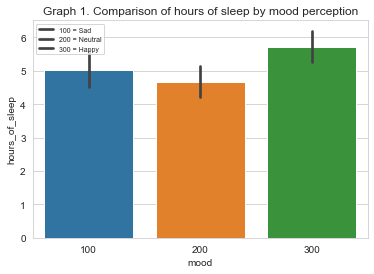

<Figure size 432x360 with 0 Axes>

In [33]:
# bar chart showing the distribution of SLEEP HOURS by mood category (100 = sad, 200 = neutral and 300 = happy)
sns.barplot(x = "mood", y="hours_of_sleep", data = data)
plt.title('Graph 1. Comparison of hours of sleep by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

### Sleeping Hours vs Activeness

In [34]:
#Average descriptive statistics of SLEEP HOURS by self-perceived activity (0 = inactive and 500 = active)
data.hours_of_sleep.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,5.037037,1.613188,2.0,4.0,5.0,6.0,9.0
500,42.0,5.452381,1.365112,3.0,5.0,5.0,6.0,8.0


<Figure size 432x360 with 0 Axes>

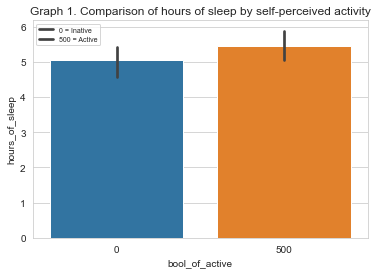

<Figure size 432x360 with 0 Axes>

In [35]:

# bar chart showing the distribution of SLEEP HOURS by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="hours_of_sleep", data = data)
plt.title('Graph 1. Comparison of hours of sleep by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

### Mood vs Activeness

In [36]:
# creating a contingency table between feeling active or inactive (bool_of_activity) x humor (mood) in percentage
pd.crosstab([data. bool_of_active], [data.mood], normalize='index', margins=True)*100

mood,100,200,300
bool_of_active,,,
0,46.296296,24.074074,29.629630
500,9.523810,33.333333,57.142857
All,30.208333,28.125000,41.666667


<Figure size 432x360 with 0 Axes>

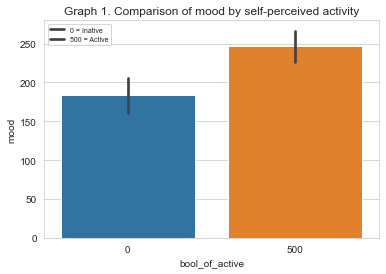

<Figure size 432x360 with 0 Axes>

In [37]:
# bar chart showing the distribution of MOOD by category of self-perceived activity (0 = inactive and 500 = active)
sns.barplot(x = "bool_of_active", y="mood", data = data)
plt.title('Graph 1. Comparison of mood by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

## Outlier analysis using Boxplot

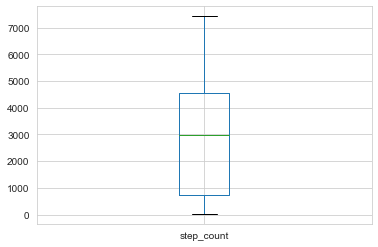

In [38]:
data.boxplot(column="step_count")  #Boxplot of Step_count

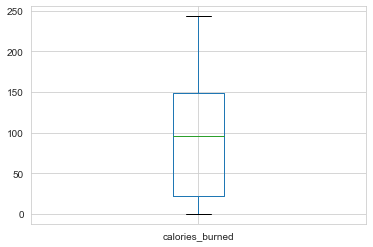

In [39]:
data.boxplot(column="calories_burned")  #Boxplot of Calories_burned

## Label Encoding of Target Column

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


## Dependent and Independent variable.

In [41]:
#Independent variables
x=pd.DataFrame(data.iloc[:,[1,2,3,4,6]])
#Dependent Variable
y=pd.DataFrame(data.iloc[:,5])


## Column Transformer

In [63]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [1])], 
                                      remainder='passthrough') 
  
x = pd.DataFrame(columnTransformer.fit_transform(x),dtype = np.str,columns=['sad','neutral','happy','step_count','calories_burned','hours_of_sleep','weight_kg'])
x

ValueError: Expected 2D array, got 1D array instead:
array=['No' 'No' 'Yes' '4435.0' '141.0' '5.0' '64.0'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
import pickle
with open('encoder.pickle', 'wb') as f:
    pickle.dump(columnTransformer1, f)

In [46]:
x.shape

(96, 7)

## Splitting dataset into train and test sets

In [48]:
#Splitting the dataset into Train set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)


## Model Building

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)   #max_leaf_nodes=26  max_depth=12
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicting the Results

In [50]:
dt_y_train=dtc.predict([['0.0', '0.0', '1.0', '4435.0', '141.0', '5.0', '64.0']])
dt_y_train

array([1], dtype=int64)

## Checking the score of our model

In [51]:
dtc.score(x_train,y_train)

0.9883720930232558

In [52]:
import pickle
pickle.dump(dtc, open('fitness.pkl','wb'))

In [72]:
enc=pickle.load(open("encoder.pickle",'rb'))

In [73]:
model=pickle.load(open("fitness.pkl","rb"))

In [74]:

dt_y_train=enc.fit_transform([['NO', 'YES', 'NO', '4435.0', '141.0', '5.0', '64.0']])
print(dt_y_train)
dt_y_train-dtc.predict(dt_y_train)
dt_y_train

[[1.0 1.0 1.0 'NO' '141.0' '5.0' '64.0']]


ValueError: could not convert string to float: 'NO'